In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load the shapefile
shapefile_path = 'Data/USA_ZIP_Code_Boundaries/USA_ZIP_Code_Boundaries.shp'
zip_codes_gdf = gpd.read_file(shapefile_path)

print(zip_codes_gdf.columns)
print(zip_codes_gdf.head())

Index(['OBJECTID', 'ZIP_CODE', 'PO_NAME', 'STATE', 'POPULATION', 'POP_SQMI',
       'SQMI', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')
   OBJECTID ZIP_CODE                       PO_NAME STATE  POPULATION  \
0         1    00001                  N Dillingham    AK         NaN   
1         2    00002      Yukon Flats Nat Wildlife    AK         NaN   
2         3    00003          Alaska Peninsula NWR    AK         NaN   
3         4    00004     W Kenai Peninsula Borough    AK         NaN   
4         5    00005  N Lake and Peninsula Borough    AK         NaN   

   POP_SQMI      SQMI    Shape__Are    Shape__Len  \
0       NaN  16019.08  1.646204e+11  3.686323e+06   
1       NaN  95862.85  1.493216e+12  1.999598e+07   
2       NaN  14572.90  1.305569e+11  5.852487e+06   
3       NaN   6510.85  6.807802e+10  3.077262e+06   
4       NaN   3760.07  4.019224e+10  1.378707e+06   

                                            geometry  
0  MULTIPOLYGON (((-160.43115 58.68935

In [3]:
# Read in NYC zip codes
df_zip = pd.read_csv('Data/uszips/uszips.csv',
                     index_col = 'zip',
                     dtype = {'borough': str, 'zip': str} )

In [4]:
# Filter geodataframe to include zip codes in NYC only
zip_codes_gdf = zip_codes_gdf[zip_codes_gdf['ZIP_CODE'].isin(df_zip.index)]
zip_codes_gdf.head()
filtered_shapefile_path = 'Data/USA_ZIP_Code_Boundaries/filtered_zip_code_shapefile.shp'
zip_codes_gdf.to_file(filtered_shapefile_path, driver='ESRI Shapefile')

In [6]:
# Load the new shapefile to verify
filtered_zip_codes_gdf = gpd.read_file(filtered_shapefile_path)
print(filtered_zip_codes_gdf.head())
len(filtered_zip_codes_gdf)

   OBJECTID ZIP_CODE   PO_NAME STATE  POPULATION   POP_SQMI  SQMI  \
0      2605    10001  New York    NY     34380.0   52892.31  0.65   
1      2606    10002  New York    NY     82797.0   72628.95  1.14   
2      2607    10003  New York    NY     55438.0   98996.43  0.56   
3      2608    10004  New York    NY      7455.0   14336.54  0.52   
4      2609    10005  New York    NY      7698.0  109971.43  0.07   

     Shape__Are    Shape__Len  \
0  2.917709e+06   8985.342691   
1  5.147777e+06  10475.385252   
2  2.528557e+06   7662.992378   
3  2.346188e+06  15734.973873   
4  3.127068e+05   2725.614094   

                                            geometry  
0  POLYGON ((-74.01068 40.75104, -74.01056 40.751...  
1  POLYGON ((-73.99759 40.71406, -73.99753 40.714...  
2  POLYGON ((-73.99696 40.73143, -73.99661 40.731...  
3  MULTIPOLYGON (((-74.04725 40.69082, -74.04725 ...  
4  POLYGON ((-74.01188 40.70656, -74.01148 40.707...  


185

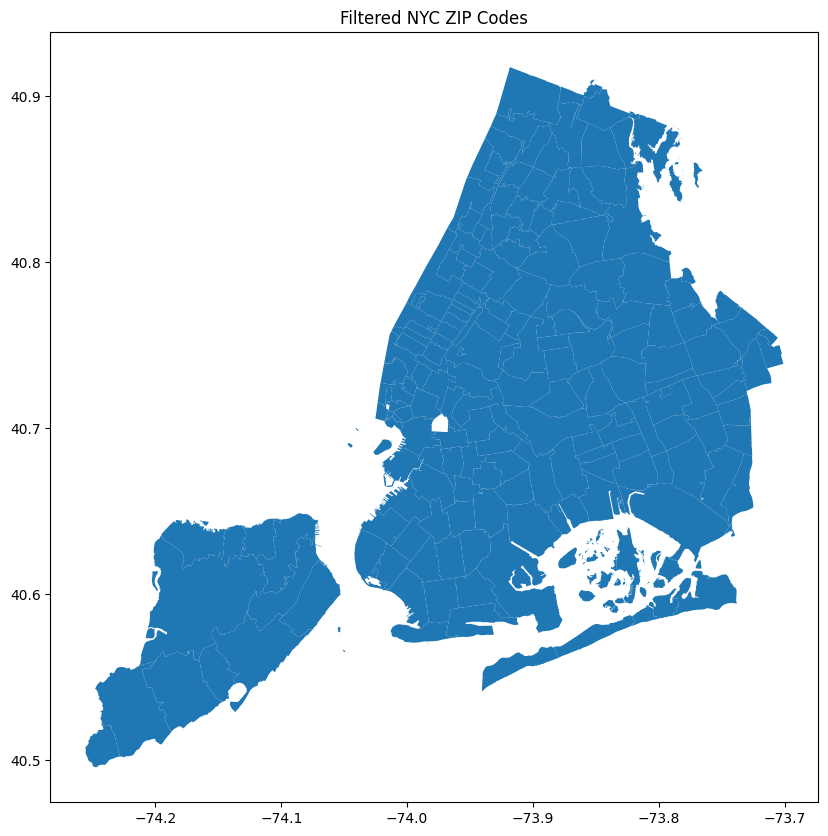

In [7]:
# Plot the filtered shapefile for verification
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_zip_codes_gdf.plot(ax=ax)
plt.title('Filtered NYC ZIP Codes')
plt.show()

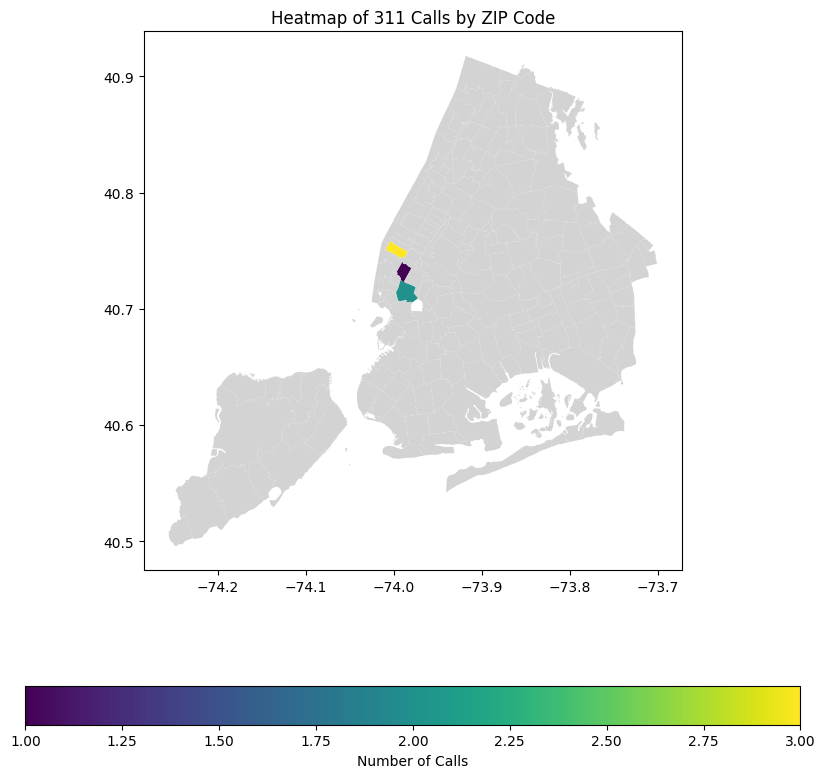

In [10]:
# Assuming the ZIP code label is 'ZIP' or similar in your shapefile
zip_code_column = 'ZIP_CODE'  # Change this to the actual column name in your shapefile

# Create a DataFrame (df_311) with sample data
data_311 = {
    'Zip': ['10001', '10002', '10003', '10001', '10002', '10001'],
    'Latitude': [40.750742, 40.721622, 40.733, 40.750742, 40.721622, 40.750742],
    'Longitude': [-73.99653, -73.98712, -73.990, -73.99653, -73.98712, -73.99653],
}
df_311 = pd.DataFrame(data_311)

# Count the number of occurrences for each ZIP code in df_311
zip_counts = df_311['Zip'].value_counts().reset_index()
zip_counts.columns = [zip_code_column, 'count']

# Merge the count data with the shapefile GeoDataFrame
filtered_zip_codes_gdf = filtered_zip_codes_gdf.merge(zip_counts, on=zip_code_column, how='left')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
filtered_zip_codes_gdf.plot(column='count', ax=ax, legend=True,
                   legend_kwds={'label': "Number of Calls",
                                'orientation': "horizontal"},
                   missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title('Heatmap of 311 Calls by ZIP Code')
plt.show()